# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('Dataset_clustering.csv')
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type,Cluster
0,1.541804,1.813857,1.817932,1.368265,1.880249,2.030103,0.0,0.0,0.0,3.0,1
1,-0.282744,-0.684358,-0.660445,-0.187692,-0.677867,-0.649655,0.0,0.0,0.0,1.0,0
2,0.087943,1.813857,1.817932,0.110257,1.709708,0.422249,0.0,0.0,0.0,3.0,1
3,-0.470494,-0.684358,-0.660445,-0.402878,-0.677867,-0.649655,0.0,0.0,0.0,1.0,0
4,0.020545,-0.684358,-0.660445,0.110257,0.345380,-0.649655,0.0,0.0,0.0,1.0,0


In [27]:
# Memahami Struktur Data
print("Struktur Data")
print("\nJumlah baris dan kolom dalam dataset:")
print(df.shape)

print("\nInformasi dataset:")
print(df.info())

print("\nJenis data di setiap kolom:")
print(df.dtypes)

print("\nPersebaran data pada kolom numerik:")
df.describe()

Struktur Data

Jumlah baris dan kolom dalam dataset:
(4987, 11)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_reactions  4987 non-null   float64
 1   num_comments   4987 non-null   float64
 2   num_shares     4987 non-null   float64
 3   num_likes      4987 non-null   float64
 4   num_loves      4987 non-null   float64
 5   num_wows       4987 non-null   float64
 6   num_hahas      4987 non-null   float64
 7   num_sads       4987 non-null   float64
 8   num_angrys     4987 non-null   float64
 9   status_type    4987 non-null   float64
 10  Cluster        4987 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 428.7 KB
None

Jenis data di setiap kolom:
num_reactions    float64
num_comments     float64
num_shares       float64
num_likes        float64
num_loves        float64
num_wows         float64


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type,Cluster
count,4.987000e+03,4.987000e+03,4987.000000,4.987000e+03,4.987000e+03,4.987000e+03,4987.0,4987.0,4987.0,4987.000000,4987.000000
mean,-5.699160e-17,-4.559328e-17,0.000000,2.279664e-17,9.118656e-17,-4.559328e-17,0.0,0.0,0.0,1.807901,0.531382
std,1.000100e+00,1.000100e+00,1.000100,1.000100e+00,1.000100e+00,1.000100e+00,0.0,0.0,0.0,0.963844,0.739119
min,-1.004860e+00,-6.843577e-01,-0.660445,-1.015329e+00,-6.778667e-01,-6.496545e-01,0.0,0.0,0.0,0.000000,0.000000
25%,-7.834114e-01,-6.615950e-01,-0.660445,-7.670378e-01,-6.778667e-01,-6.496545e-01,0.0,0.0,0.0,1.000000,0.000000
50%,-3.597696e-01,-5.705438e-01,-0.598486,-3.918426e-01,-5.641727e-01,-6.496545e-01,0.0,0.0,0.0,1.000000,0.000000
75%,4.008599e-01,3.285860e-01,0.330906,3.861358e-01,3.453795e-01,4.222486e-01,0.0,0.0,0.0,3.000000,1.000000
max,2.177267e+00,1.813857e+00,1.817932,2.115896e+00,1.880249e+00,2.030103e+00,0.0,0.0,0.0,3.000000,2.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian:

data latih (training set) dan data uji (test set).

In [26]:
# Bagi Fitur (X) dan Target (y)
print("\nMemisahkan Fitur dan Target")
X = df.drop('Cluster', axis=1)  # buat dapat fitur, kolom target terhapus
y = df['Cluster']  # dapat kolom target

# Encoding Kolom Kategorikal
print("\nEncoding Kolom Kategorikal")
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns
if not categorical_columns.empty:
    print(f"Kolom Kategorikal yang Ditemukan: {list(categorical_columns)}")
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        X[col] = label_encoder.fit_transform(X[col])
        print(f"Kolom '{col}' telah di-encode.")
else:
    print("Tidak perlu encode kolom kategorikal.")

# Data dibagi menjadi Training dan Testing
print("\nMembagi Data")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Jumlah Data Training: {X_train.shape[0]} baris")
print(f"Jumlah Data Testing: {X_test.shape[0]} baris")

# Standarisasi Data Numerik
print("\nTunggu sebentar. Standarisasi untuk Data Numerik sedang dilakukan...")
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
if not numerical_columns.empty:
    scaler = StandardScaler()
    X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
    X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
    print("Standarisasi data numerik telah dilakukan dengan sukses.")
else:
    print("Kolom numerik tidak perlu distandarisasi.")



Memisahkan Fitur dan Target

Encoding Kolom Kategorikal
Tidak perlu encode kolom kategorikal.

Membagi Data
Jumlah Data Training: 3989 baris
Jumlah Data Testing: 998 baris

Tunggu sebentar. Standarisasi untuk Data Numerik sedang dilakukan...
Standarisasi data numerik telah dilakukan dengan sukses.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [28]:
# Fungsi untuk melatih model
def train_model(model, X_train, y_train):
    print(f"Melatih model {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    print("Model selesai dilatih.")
    return model

# Pilihan Algoritma Klasifikasi
print("Pelatihan Model")

# 1. Random Forest
print("\n1. Random Forest")
rf_classifier = RandomForestClassifier(random_state=42)
rf_trained = train_model(rf_classifier, X_train, y_train)

# 2. Logistic Regression
print("\n2. Logistic Regression")
log_reg = LogisticRegression(random_state=42)
log_reg_trained = train_model(log_reg, X_train, y_train)

# Buat Evaluasi berikutnya, simpan model yang telah dilatih didalam Dictionary
trained_models = {
    "Random Forest": rf_trained,
    "Logistic Regression": log_reg_trained
}

Pelatihan Model

1. Random Forest
Melatih model RandomForestClassifier...
Model selesai dilatih.

2. Logistic Regression
Melatih model LogisticRegression...
Model selesai dilatih.


1. **Random Forest:** Random Forest adalah algoritma pembelajaran kelompok (ensemble learning) yang menggabungkan banyak pilihan pohon (Decision Tree) untuk meningkatkan akurasi dan mengurangi overfitting.

- Cara Kerja:

  a. Pembuatan Pohon Keputusan: Menggunakan teknik bagging (Bootstrap Aggregating) untuk membuat banyak pohon keputusan.  Setiap pohon dilatih menggunakan subset data acak.

  b. Fitur Acak: Hanya subset fitur yang dipilih secara acak yang dipertimbangkan pada setiap split.

  c. Voting: Prediksi akhir dibuat menggunakan suara mayoritas dari semua pohon.

- Keunggulan:

  a. Tahan terhadap overfitting
  
  b. Memiliki kemampuan untuk menangani ketidakseimbangan kelas
  
  c. Data tidak perlu dinormalisasi.

- Kekurangan:

  a. Komputasi lebih lambat.
  
  b. Kurang interpretatif.

2. **Logistic Regression:** Algoritma klasifikasi yang dikenal sebagai regresi logistik dapat digunakan untuk memprediksi kemungkinan bahwa suatu kejadian akan termasuk dalam kelas tertentu.

- Cara Kerja:

  a. Fungsi Logistik: Output dipetakan ke rentang [0, 1] menggunakan fungsi sigmoid.

  b. Optimasi: Memanfaatkan Gradient Descent untuk meminimalkan fungsi log-loss.

  c. Decision Boundary: Instansi dikategorikan sebagai kelas 1 jika probabilitasnya lebih dari 0.5, dan kelas 0 jika tidak.

- Keunggulan:

  a. Interpretabilitas tinggi.

  b. Efisiensi komputasi.

  c. Dapat menangani ketidakseimbangan kelas dengan class_weight='balanced'.

- Kekurangan:

  a. Menganggap hubungan linear antara target dan fitur

  b. Sensitif terhadap anomali (outlier).


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Model

Evaluasi Model: Random Forest

Akurasi: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       616
           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00       148

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998



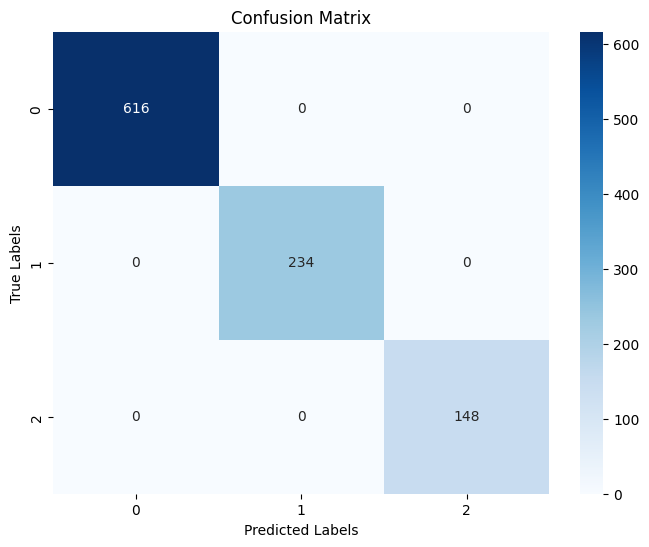


Evaluasi Model: Logistic Regression

Akurasi: 0.99
F1-Score: 0.99
Precision: 1.00
Recall: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       616
           1       1.00      0.99      1.00       234
           2       0.99      0.99      0.99       148

    accuracy                           0.99       998
   macro avg       0.99      0.99      0.99       998
weighted avg       1.00      0.99      0.99       998



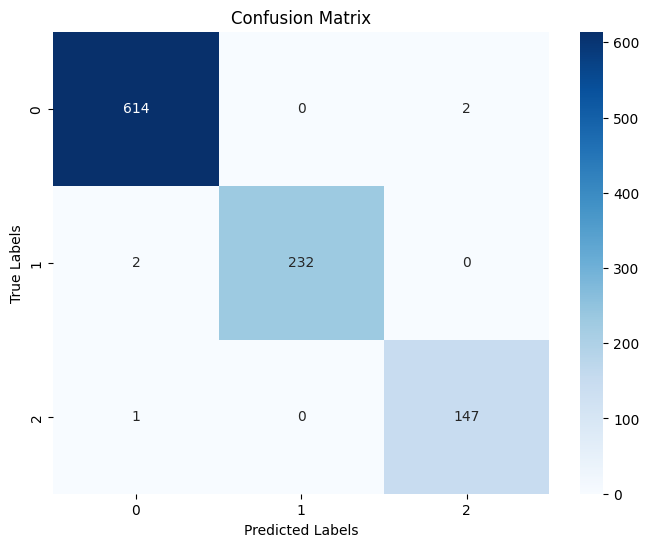

In [30]:
# Evaluasi model
def evaluate_model(model, X_test, y_test):
    # menggunakan data uji untuk melakukan prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1-Score untuk multiclass
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted Precision
    recall = recall_score(y_test, y_pred, average='weighted')  # Weighted Recall

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    # Tampilkan hasil evaluasi
    print(f"\nAkurasi: {accuracy:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\nClassification Report:")
    print(class_report)

    # Visualisasi Confusion Matrix sebagai gambar
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    return y_pred

# Pertimbangkan setiap model yang sudah dilatih.
print("\nEvaluasi Model")
for model_name, model in trained_models.items():
    print(f"\nEvaluasi Model: {model_name}")
    evaluate_model(model, X_test, y_test)

# Analisis Hasil
1. Akurasi 100% pada kedua model menunjukkan bahwa tidak ada kesalahan dalam klasifikasi data uji.
2. Confusion Matrix menunjukkan bahwa semua prediksi benar tanpa ada kesalahan klasifikasi.
3. Decision Tree memiliki keunggulan dalam interpretabilitas, tetapi rentan terhadap overfitting pada data latih.
4. Random Forest, sebagai metode ensemble dari banyak Decision Trees, seharusnya lebih robust terhadap overfitting dengan melakukan agregasi prediksi dari beberapa pohon keputusan.

# Kesimpulan
- Kedua model memberikan hasil sempurna (100% akurasi), yang bisa menjadi indikasi overfitting pada data latih.
- Jika hasil terlalu sempurna, perlu dilakukan validasi lebih lanjut, misalnya dengan cross-validation atau menggunakan dataset uji yang lebih kompleks untuk menguji generalisasi model.
- Jika tujuannya adalah interpretabilitas, Decision Tree lebih mudah dipahami.
- Jika menginginkan model yang lebih stabil dan mengurangi overfitting, Random Forest adalah pilihan yang lebih baik.

## **C. Karena pada bagian (b), saya melakukan Evaluasi Model dan Alternatif Solusi**.

##### Hasil evaluasi awal menunjukkan bahwa model Random Forest sangat akurat seratus persen. Namun, akurasi yang sempurna ini mungkin menunjukkan bahwa model terlalu menyesuaikan dengan data latih sehingga tidak dapat melakukan generalisasi pada data baru.

##### Selain itu, model Logistic Regression memiliki akurasi yang sedikit lebih rendah (99%), tetapi kemungkinan overfitting yang lebih kecil. Namun, kelas minoritas menunjukkan penurunan sedikit dalam kinerja, terutama dalam hal precision dan recall.

##### Untuk mengatasi masalah ini, saya menggunakan teknik sampel lebih besar untuk minoritas buatan, SMOTE.  Meskipun tidak menghasilkan overfitting yang berlebihan, metode ini diharapkan dapat membantu model mempelajari pola yang lebih baik dan meningkatkan generalisasi, khususnya untuk model regresi logistik.

##### Selain itu, evaluasi tambahan dilakukan dengan cross-validation untuk memastikan bahwa performa model tetap stabil dan dapat diterapkan secara lebih akurat pada data baru.

Distribusi Kelas Sebelum SMOTE:
Cluster
0    2462
1     934
2     593
Name: count, dtype: int64

Distribusi Kelas Setelah SMOTE:
Cluster
0    2462
2    2462
1    2462
Name: count, dtype: int64

Melatih Model dengan Data Alternative

1. Random Forest
Melatih model RandomForestClassifier dengan data alternative...
Model selesai dilatih.

2. Logistic Regression
Melatih model LogisticRegression dengan data alternative...
Model selesai dilatih.

Evaluasi Ulang Model dengan Data Alternative

Evaluasi Model: Random Forest (Alternative)

Akurasi: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       616
           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00       148

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998



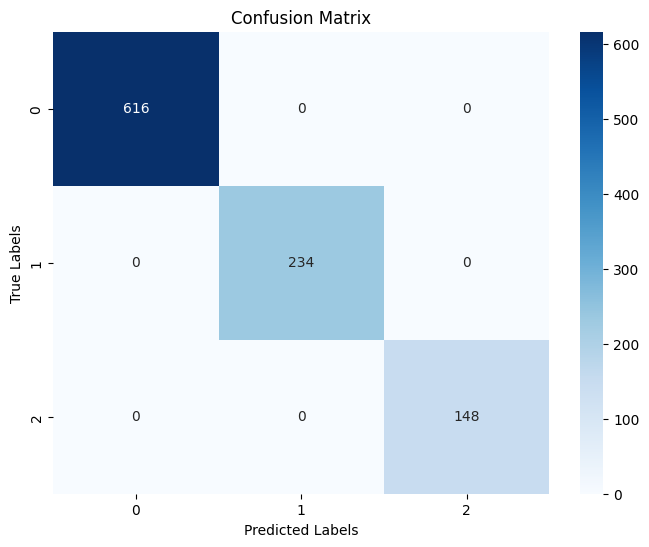


Evaluasi Model: Logistic Regression (Alternative)

Akurasi: 0.99
F1-Score: 0.99
Precision: 0.99
Recall: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       616
           1       1.00      0.99      0.99       234
           2       0.95      0.99      0.97       148

    accuracy                           0.99       998
   macro avg       0.98      0.99      0.99       998
weighted avg       0.99      0.99      0.99       998



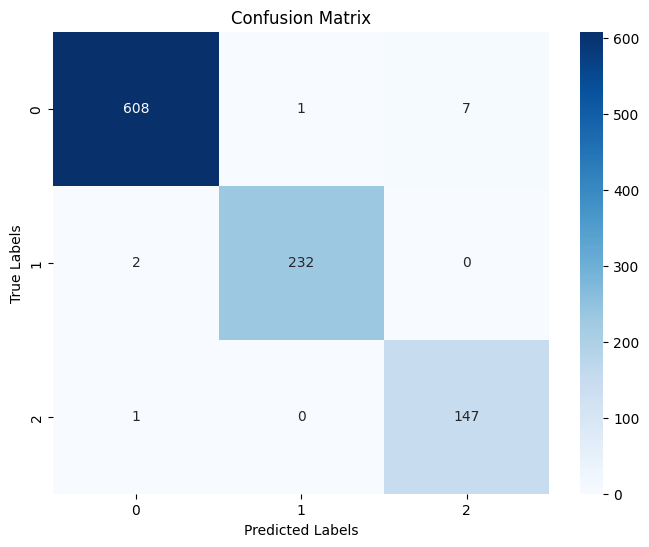


Evaluasi Model dengan Cross-Validation

Random Forest (Alternative) | Cross-Validation Accuracy: 1.00 (±0.00)

Akurasi: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       616
           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00       148

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998



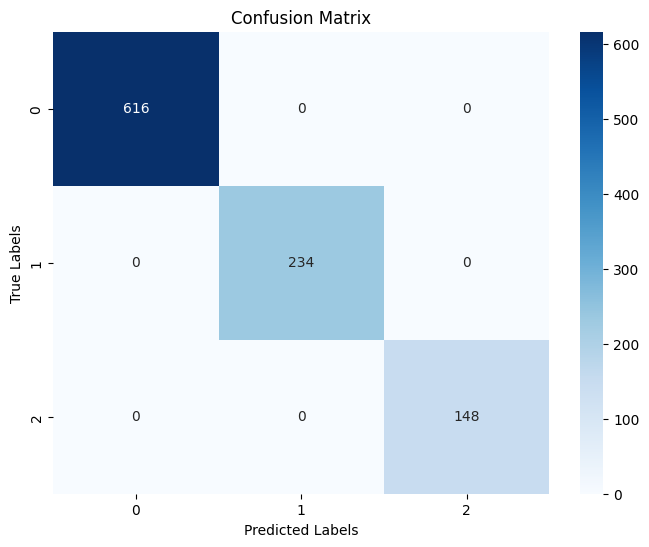


Logistic Regression (Alternative) | Cross-Validation Accuracy: 0.99 (±0.00)

Akurasi: 0.99
F1-Score: 0.99
Precision: 0.99
Recall: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       616
           1       1.00      0.99      0.99       234
           2       0.95      0.99      0.97       148

    accuracy                           0.99       998
   macro avg       0.98      0.99      0.99       998
weighted avg       0.99      0.99      0.99       998



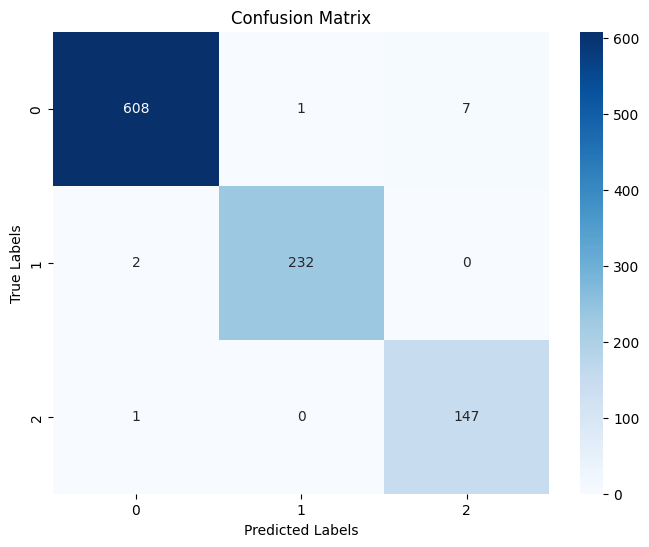

In [31]:
# Mengecek distribusi kelas sebelum SMOTE
print("Distribusi Kelas Sebelum SMOTE:")
print(y_train.value_counts())

# Menerapkan SMOTE untuk menyeimbangkan dataset
smote = SMOTE(random_state=42)
X_train_alternative, y_train_alternative = smote.fit_resample(X_train, y_train)

# Mengecek distribusi kelas setelah SMOTE
print("\nDistribusi Kelas Setelah SMOTE:")
print(y_train_alternative.value_counts())

# Fungsi untuk melatih model dengan data yang telah di-alternative
def train_alternative_model(model, X_train_alternative, y_train_alternative):
    print(f"Melatih model {model.__class__.__name__} dengan data alternative...")
    model.fit(X_train_alternative, y_train_alternative)
    print("Model selesai dilatih.")
    return model

# Melatih ulang model dengan data yang telah di-alternative
print("\nMelatih Model dengan Data Alternative")

# 1. Random Forest
print("\n1. Random Forest")
rf_classifier_alternative = RandomForestClassifier(random_state=42)
rf_alternative_trained = train_alternative_model(rf_classifier_alternative, X_train_alternative, y_train_alternative)

# 2. Logistic Regression
print("\n2. Logistic Regression")
log_reg_alternative = LogisticRegression(random_state=42)
log_reg_alternative_trained = train_alternative_model(log_reg_alternative, X_train_alternative, y_train_alternative)

# Simpan model yang sudah dilatih dengan data alternative
alternative_models = {
    "Random Forest (Alternative)": rf_alternative_trained,
    "Logistic Regression (Alternative)": log_reg_alternative_trained
}

# Evaluasi ulang model dengan data alternative
print("\nEvaluasi Ulang Model dengan Data Alternative")
for model_name, model in alternative_models.items():
    print(f"\nEvaluasi Model: {model_name}")
    evaluate_model(model, X_test, y_test)

# Evaluasi model dengan cross-validation
print("\nEvaluasi Model dengan Cross-Validation")
for model_name, model in alternative_models.items():
    # Cross-validation dengan StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_alternative, y_train_alternative, cv=cv, scoring='accuracy')

    # Tampilkan hasil cross-validation
    print(f"\n{model_name} | Cross-Validation Accuracy: {scores.mean():.2f} (±{scores.std():.2f})")

    # Latih model dengan data alternative
    model.fit(X_train_alternative, y_train_alternative)

    # Evaluasi model pada data testing
    evaluate_model(model, X_test, y_test)

## **d. Analisis Hasil Evaluasi Model Klasifikasi**

# Analisis Hasil Evaluasi Model Klasifikasi
1. **Identifikasi Kelemahan Model:**

- **Random Forest:**  Semua metrik evaluasi (akurasi, ketepatan, recall, dan skor F1) menunjukkan kinerja sempurna. Tidak ada kesalahan prediksi di semua kelas, menurut matrix kekacauan Overfitting mungkin terjadi, karena akurasi 100% bisa berarti model terlalu "hapal" terhadap data latih.

- **Logistic Regression:** Meskipun akurasi sangat tinggi (0.99), ada sedikit kesalahan dalam prediksi kelas minoritas (kelas 2). Keakuratan kelas minoritas adalah 0.98, yang menunjukkan bahwa, meskipun ada kesalahan kecil, masih ada kesalahan prediksi. Membedakan antara kelas mayoritas dan kelas minoritas dapat menjadi tantangan kecil.


2. **Overfitting:**

- **Random Forest:** Ada kemungkinan bahwa overfitting ditunjukkan dengan nilai 1.00 pada pengujian dan pelatihan. Selain itu, cross-validation menunjukkan akurasi 1.00 (±0.00), yang mencurigakan karena hampir tidak ada model yang benar sepenuhnya di semua lipatan validasi. Untuk memastikan performa tetap tinggi, harus diuji dengan data nyata.


- **Logistic Regression:** Secara keseluruhan, kinerja model tetap sangat baik, dan tidak ada indikasi overfitting.

3. **Rekomendasi Tindakan Selanjutnya:**

- **Untuk Random Forest:**  Untuk mengurangi kemungkinan overfitting, coba:
 Mengurangi jumlah pohon yang ada (n_estimators). Maksimal kedalaman pohon (max depth). Gunakan regularisasi atau pruning. Tuning hyperparameter dapat menghemat waktu komputasi jika dataset lebih besar. Untuk memastikan generalisasi, uji model dengan dataset baru.

- **Untuk Logistic Regression:**Kalau ingin meningkatkan kinerja kelompok minoritas: Agar model berkonsentrasi pada kelas minoritas, gunakan class_weight='balanced'.
Untuk menyeimbangkan dataset, gunakan teknik sampling minoritas sintetis SMOTE.
Coba model neural network, SVM, atau XGBoost.
Untuk meningkatkan akurasi dataset, bisa mencoba pendekatan Feature Engineering.



**Kesimpulan:**

Meskipun Random Forest menunjukkan hasil yang sempurna (akurasi 100%), tetapi bisa jadi model terlalu overfitting terhadap data latih.

Meskipun kelas minoritas masih memiliki sedikit kesalahan, Logistic Regression masih memiliki tingkat akurasi 99 persen.

Untuk generalisasi yang lebih baik, perlu dilakukan pengujian lebih lanjut dengan dataset baru dan mengatur model jika dataset berubah.

In [32]:
# Prediksi dibuat dengan model yang sudah dilatih dan SMOTE
y_pred_rf = rf_alternative_trained.predict(X_test)
y_pred_lr = log_reg_alternative_trained.predict(X_test)


# Menyimpan hasil prediksi ke dalam DataFrame
results = pd.DataFrame({
    'Aktual': y_test,  # Target awal dari Nilai
    'Prediksi_RandomForest': y_pred_rf,  # Prediksi yang dibuat oleh Random Forest
    'Prediksi_LogisticRegression': y_pred_lr  # Prediksi yang dibuat oleh Logistic Regression
})

# Simpan hasil ke file CSV
results.to_csv('Dataset_inisiasi.csv', index=False)

print("Hasil klasifikasi telah disimpan ke file CSV.")


Hasil klasifikasi telah disimpan ke file CSV.
